# Digit Recognizer

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers as L

## Read the data

In [4]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/sample_submission.csv")

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Transform the data

In [6]:
x_train = train.drop("label", axis=1).astype("float").values.reshape(-1, 28, 28, 1)
y_train = train.label.astype("float")
x_test = test.astype("float").values.reshape(-1, 28, 28, 1)

## Shape of the data

In [7]:
print("Shapes")
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)

Shapes
x_train : (42000, 28, 28, 1)
x_test : (28000, 28, 28, 1)
y_train : (42000,)


## One Hot Encoding

In [8]:
print("Shape before one hot encoding : ", y_train.shape)
print(y_train[:5])
print()
y_train_ohe = tf.keras.utils.to_categorical(y_train, 10)
print("Shape after one hot encoding  :", y_train_ohe.shape)
print(y_train_ohe[:5])

Shape before one hot encoding :  (42000,)
0    1.0
1    0.0
2    1.0
3    4.0
4    0.0
Name: label, dtype: float64

Shape after one hot encoding  : (42000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## See what the images look like

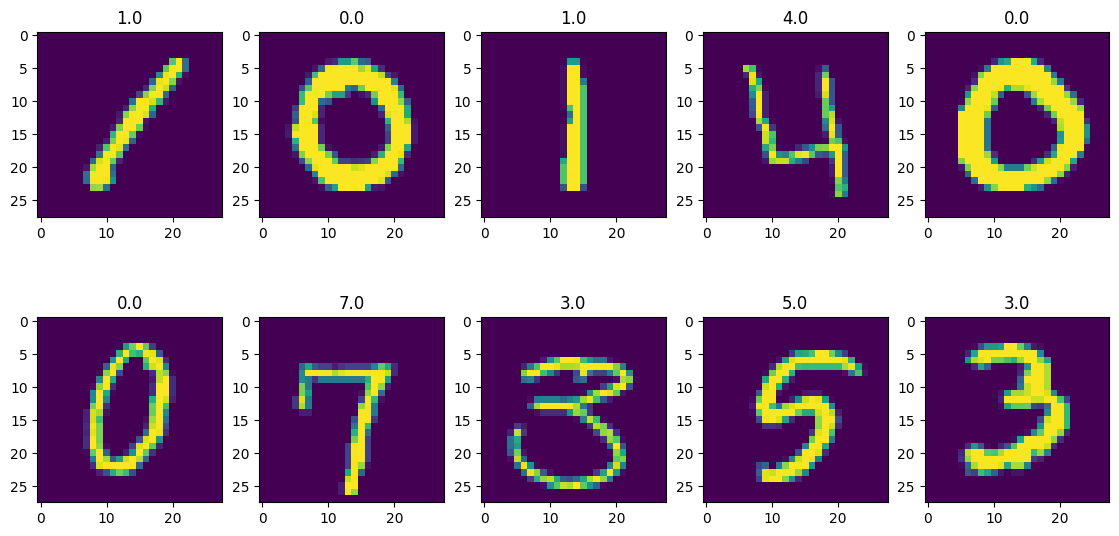

In [35]:
def show_images(index):
    for i in range(0, 10):
        plt.subplot(2, 5, i + 1)
        plt.subplots_adjust(right=1.8, top=1.2)

        k = (index + i) % len(x_train)
        plt.imshow(x_train[k])
        plt.title(y_train[k])

def show_test_images(index, numbers):
    for i in range(0, 10):
        plt.subplot(2, 5, i + 1)
        plt.subplots_adjust(right=1.8, top=1.2)

        k = (index + i) % len(x_test)
        plt.title(numbers[k])
        plt.imshow(x_test[k])

show_images(0)

## Model Definition

In [24]:
model = tf.keras.models.Sequential([
    L.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=x_train.shape[1:]),
    L.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    L.MaxPooling2D(pool_size=2, strides=2),

    L.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="Same"),
    L.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="Same"),
    L.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    L.Dropout(0.25),

    L.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="Same"),
    L.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="Same"),
    L.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    L.Dropout(0.25),

    L.Flatten(),
    L.Dense(256, activation="relu"),
    L.Dense(256, activation="relu"),
    L.Dropout(0.5),
    
    L.Dense(10, activation="softmax")
])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [26]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("accuracy") > 0.999:
            print("Reached 99.9% accuracy - Stopped training!")
            self.model.stop_training = True

callback = MyCallback()

In [27]:
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, name="Adam")
model.compile(optimizer=Optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
model.fit(x_train, y_train_ohe, batch_size=100, epochs=50, callbacks=[callback])

Epoch 1/50
420/420 [==============================] - 66s 154ms/step - loss: 0.7068 - accuracy: 0.7867
Epoch 2/50
420/420 [==============================] - 63s 150ms/step - loss: 0.1127 - accuracy: 0.9668
Epoch 3/50
420/420 [==============================] - 67s 160ms/step - loss: 0.0780 - accuracy: 0.9777
Epoch 4/50
420/420 [==============================] - 67s 160ms/step - loss: 0.0606 - accuracy: 0.9817
Epoch 5/50
420/420 [==============================] - 68s 162ms/step - loss: 0.0523 - accuracy: 0.9846
Epoch 6/50
420/420 [==============================] - 71s 169ms/step - loss: 0.0448 - accuracy: 0.9862
Epoch 7/50
420/420 [==============================] - 69s 163ms/step - loss: 0.0412 - accuracy: 0.9880
Epoch 8/50
420/420 [==============================] - 69s 165ms/step - loss: 0.0360 - accuracy: 0.9891
Epoch 9/50
420/420 [==============================] - 67s 158ms/step - loss: 0.0350 - accuracy: 0.9900
Epoch 10/50
420/420 [==============================] - 68s 163ms/step - l

## Get the predicted numbers

In [36]:
results = model.predict(x_test)

875/875 [==============================] - 9s 11ms/step


In [34]:
numbers = np.argmax(results, axis=1)
numbers[:5]

array([2, 0, 9, 0, 3], dtype=int64)

## Check the performance of the model

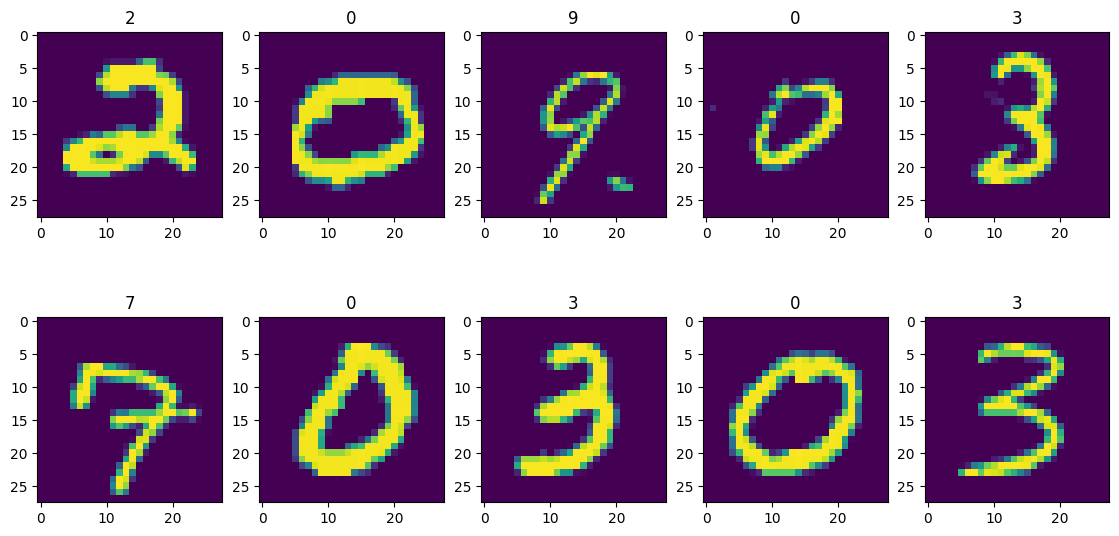

In [37]:
show_test_images(0, numbers)

## Submission

In [40]:
submission = pd.concat([pd.Series(range(1, len(sample) + 1)), pd.Series(numbers, name="Label")], axis=1)
submission.to_csv("submission.csv", index=False)